# Train Data using XGBoost Model

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from src.models.train_model import *
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Test with Ordinal Encoding Data

### Load data

In [2]:
file_path = '../data/processed/2_1_processed_ordinal_encoding_xgboost.csv'
print(f'Loading file from {file_path}')

df = pd.read_csv(file_path)
x = df.drop(['Value', 'Wage'], axis=1)
y = df['Value']

Loading file from ../data/processed/2_1_processed_ordinal_encoding_xgboost.csv


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Train Regressor with XGBoost backend

In [5]:
params = {}
if False:
    try:
        with open('best_params_xgbost.json') as fp:
            params = json.load(fp)
            pp.pprint(params)
    except:
        params = {}

model = Regressor(**params)

Using XGBoost as backend


In [6]:
print('Tuning HyperParameters')
model.tune_hyper_parameters(x_train, y_train)

Tuning HyperParameters
100%|██████████| 100/100 [10:52<00:00,  6.52s/it, best loss: 1019780436577.0103]
Best: {'colsample_bylevel': 0.5673233929139453, 'colsample_bynode': 0.8558219286714344, 'colsample_bytree': 0.47278298461987667, 'eval_metric': 'rmse', 'learning_rate': 0.24302788988786714, 'max_delta_step': 0.0, 'max_depth': 2.0, 'min_child_weight': 3.7744219380009523, 'min_split_loss': 5.802953678780522, 'n_estimators': 430.0, 'objective': 'reg:squarederror', 'reg_alpha': 1.2214441907651443, 'reg_lambda': 1.6652810129988875, 'subsample': 0.3700592609818085}
Using XGBoost as backend


In [7]:
print(f'Training model')
model.train(x_train, y_train)

Training model


In [8]:
print('Predicting test samples')
predictions: pd.DataFrame = model.predict(x_test)

Predicting test samples


In [9]:
print('Prediction Finished. RMSE:')
print(mean_squared_error(y_test, predictions, squared=False))

Prediction Finished. RMSE:
866061.6853501903


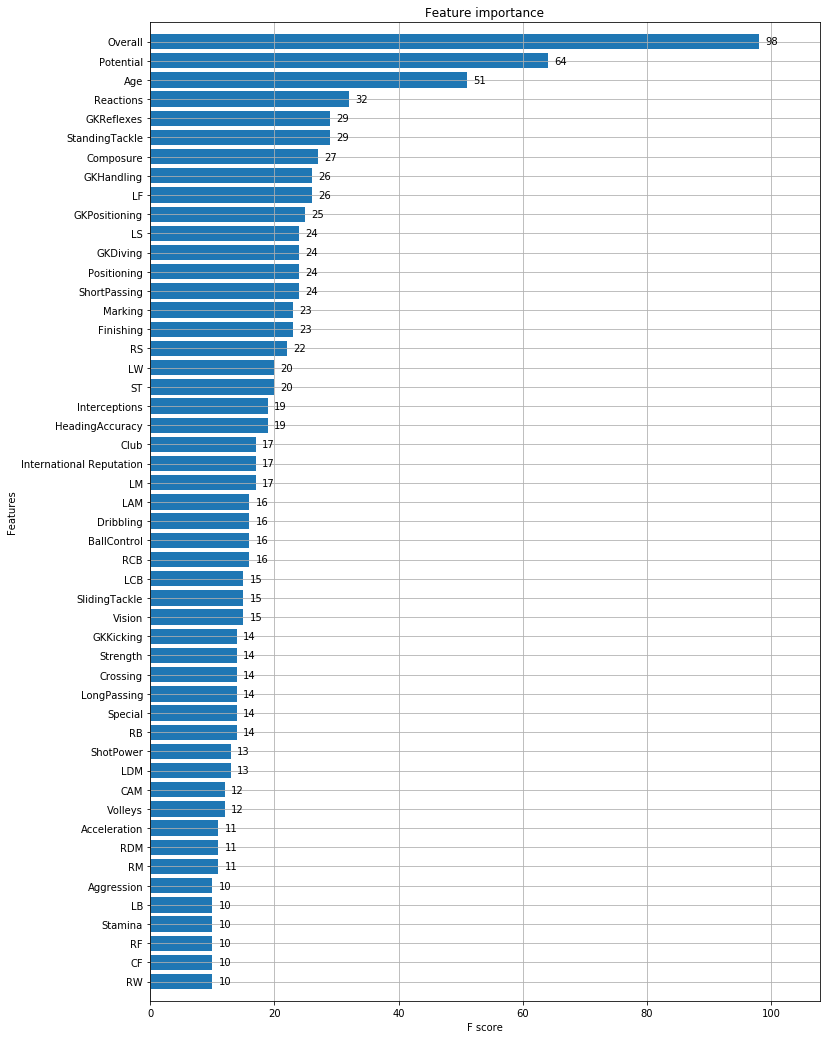

In [10]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model._model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Test with OneHotEncoding Data

### Load Data

In [2]:
file_path = '../data/processed/2_1_processed_onehot_encoding_xgboost.csv'
print(f'Loading file from {file_path}')

df = pd.read_csv(file_path)
x = df.drop(['Value', 'Wage'], axis=1)
y = df['Value']

Loading file from ../data/processed/2_1_processed_onehot_encoding_xgboost.csv


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Train Regressor with XGBoost backend

In [4]:
params = {}
if False:
    try:
        with open('best_params_xgbost.json') as fp:
            params = json.load(fp)
            pp.pprint(params)
    except:
        params = {}

model = Regressor(**params)

Using XGBoost as backend


In [5]:
print('Tuning HyperParameters')
model.tune_hyper_parameters(x_train, y_train)

Tuning HyperParameters
100%|██████████| 100/100 [1:59:05<00:00, 71.45s/it, best loss: 862914562807.395]    
Best: {'colsample_bylevel': 0.8960448199674866, 'colsample_bynode': 0.4643871255615969, 'colsample_bytree': 0.576005459961078, 'eval_metric': 'rmse', 'learning_rate': 0.12788923945542846, 'max_delta_step': 0.0, 'max_depth': 4.0, 'min_child_weight': 3.5340246336179484, 'min_split_loss': 8.172169313241678, 'n_estimators': 280.0, 'objective': 'reg:squarederror', 'reg_alpha': 1.1015712065357124, 'reg_lambda': 5.997768101891508, 'subsample': 0.4461766203550462}
Using XGBoost as backend


In [6]:
print(f'Training model')
model.train(x_train, y_train)

Training model


In [7]:
print('Predicting test samples')
predictions: pd.DataFrame = model.predict(x_test)

Predicting test samples


In [8]:
print('Prediction Finished. RMSE:')
print(mean_squared_error(y_test, predictions, squared=False))

Prediction Finished. RMSE:
944096.5487240619


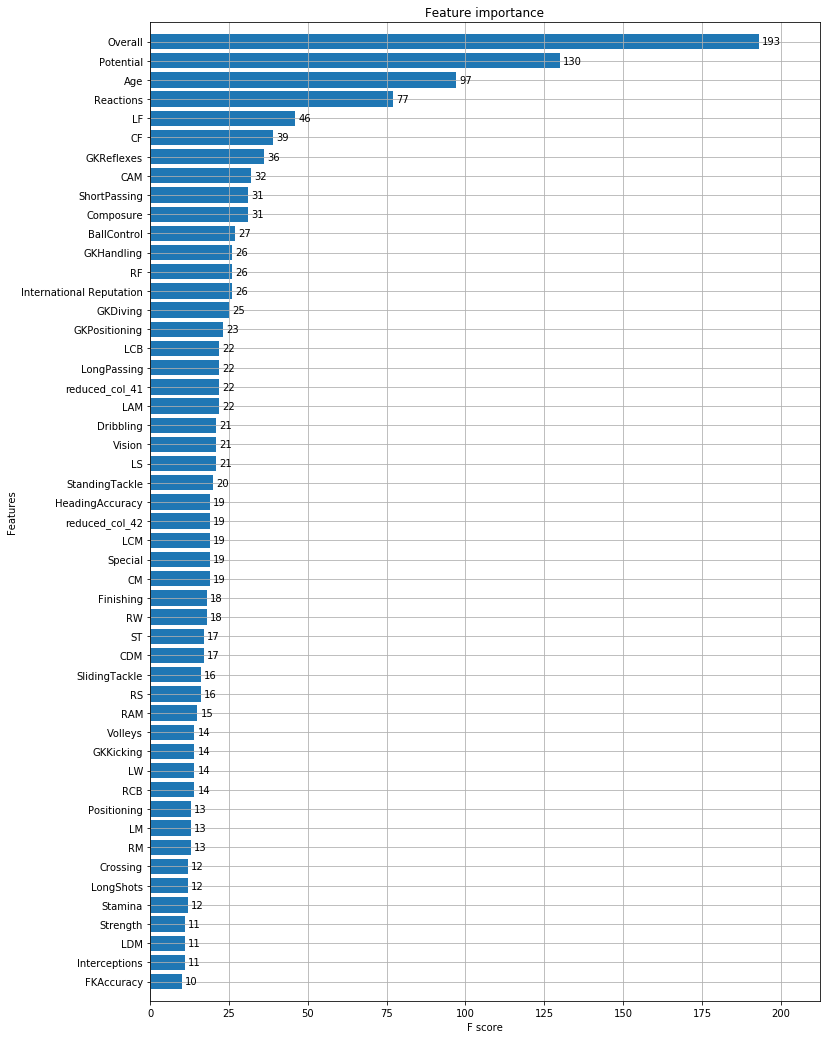

In [9]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model._model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Conclusion on XGBoost model

There were a sligthly improvement in both training scenarios by removing nomalization of the data. However, there is not enough statistic data to assure this result with known uncertainty. There would be necessary multiple runs with different sets of data to calculate this. But this result can be used to have insights of how the process work. So using the data as-is, without normalization, for XGBoost model, can improve the result a little.

Just like the previous version of the training, the feature engineering using Ordinary Encoding instead of One Hot Encoding performed slightly better.